In [7]:
import turlib as tp
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# file location in drive
path = 'DATA/naomi_system_sample_int.fits'
path_G_sim = 'DATA/Gt_NAOMI.fits'

In [3]:
# read data from aotpy
vector_tp, dimm_data = tp.reader_aotpy(path, path_G_sim, dimm_data=True, estimate_noise=True)

C:\Users\nunom\Documents\TURLIB\turlib\turlib.py:96: UserWarning: Either loop delay or framerate isnt correctly defined, assumed frame delay == 2
  warnings.warn('Either loop delay or framerate isnt correctly defined, assumed frame delay == 2')


In [4]:
d, modes, ai2, noise_estimate, n_rec_modes, m, c_mat = vector_tp[:-1]

# estimate turbulence parameters
turbulence_estimate = tp.iterative_estimator(d, modes, ai2, noise_estimate, n_rec_modes, m, c_mat,
                                             n_iter=5, hro=4, lro=2, full_vector=True)

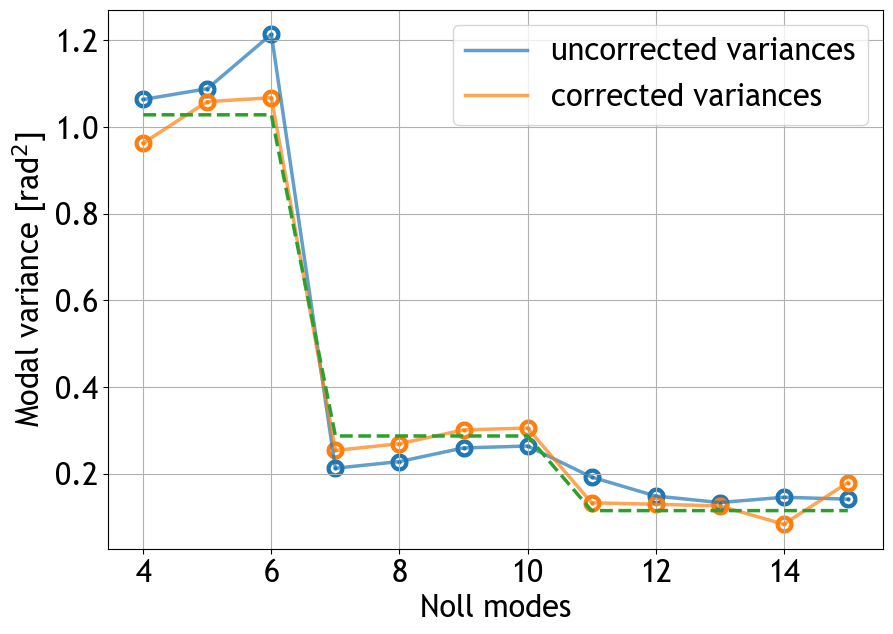

In [12]:
'''
Dictate the figure structure
'''

#sns.set_theme()
font = {'family': 'Trebuchet MS',
        'size': 22}

matplotlib.rc('font', **font)

plt.figure(figsize=(10,7))


# [3:] appears since we are disregarding piston, tip/tilt in the fitted
plt.plot(modes,ai2[3:], lw=2.5, label = 'uncorrected variances', alpha=.7)
plt.scatter(modes,ai2[3:], lw=10, marker='.', color='tab:blue')

# turbulence_estimate[-1] returns the last fitted variances
plt.plot(modes,turbulence_estimate[-1], lw=2.5, label = 'corrected variances', alpha=.7)
plt.scatter(modes,turbulence_estimate[-1], lw=10, color='tab:orange', marker = '.')

r0, L0 = turbulence_estimate[0][-1], turbulence_estimate[1][-1]
plt.plot(modes,tp.nz_variance(r0, L0, d, n_rec_modes)[3:],'--', lw= 2.5)
plt.grid()

plt.legend()
plt.xlabel('Noll modes')
plt.ylabel(r'Modal variance [rad$^2$]')
plt.savefig('fitted_variances_real.svg')

In [11]:
# compare to DIMM estimate

print('seeing at zenith [arcsec] ==', tp.seeing_at_zenith(turbulence_estimate[0][-1], dimm_data[1]))
print('dimm seeing [arcsec] ==', dimm_data[0])
print('Difference to the DIMM [%] ==',(dimm_data[0] - tp.seeing_at_zenith(turbulence_estimate[0][-1], dimm_data[1]))*100/dimm_data[0])

seeing at zenith [arcsec] == 0.4802066861159813
dimm seeing [arcsec] == 0.52
Difference to the DIMM [%] == 7.652560362311297
